<a href="https://colab.research.google.com/github/calebboa/calebboa/blob/main/Deskriptive_Statistik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importieren der notwendigen Bibliotheken
import pandas as pd
import numpy as np

In [2]:
# Repository von github klonen, damit die Daten verfügbar sind
! git clone https://github.com/AlexKressner/Statistik

Cloning into 'Statistik'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 75 (delta 32), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (75/75), 791.74 KiB | 3.50 MiB/s, done.
Resolving deltas: 100% (32/32), done.


In [3]:
pd.options.display.max_columns = 100

In [4]:
! ls Statistik

Deskriptive_Statistik.ipynb  Statistisches_Testen.ipynb
house_price.csv		     Wahrscheinlichkeitsrechnung.ipynb


# Kaggle Competition **House Price Prediction**
https://www.kaggle.com/c/house-prices-advanced-regression-techniques

## 1. Kennzahlen für diskrete Merkmale

In [5]:
# Daten laden
data = pd.read_csv("./Statistik/house_price.csv")

In [6]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
data.YrSold

,YrSold
0,2008
1,2007
2,2008
3,2006
4,2008
...,...
1455,2007
1456,2010
1457,2010
1458,2010


In [8]:
data.YrSold = data.YrSold.astype("object")

**AUFGABE:** Bitte berechnen Sie die absolute Häufigkeit des Merkmals "YrSold"! Nutzen Sie dafür die `pandas` Funktion `value_counts()`!

In [9]:
abs = data.YrSold.value_counts()
print(abs)

YrSold
2009    338
2007    329
2006    314
2008    304
2010    175
Name: count, dtype: int64


**AUFGABE:** Bitte stellen Sie die absoluten Häufigkeiten in einem Säulendiagramm dar! Nutzen Sie dafür die Funktion `plot()`.



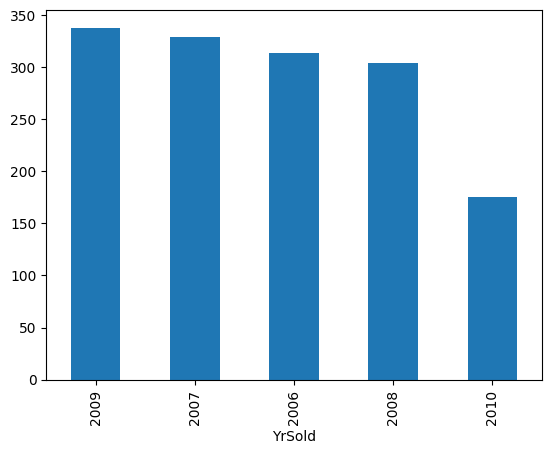

In [10]:
import matplotlib.pyplot as plt
abs.T.plot(kind="bar")
plt.show()

**AUFGABE:** Bitte berechnen Sie die relativen Häufigkeit des Merkmals "YrSold"!

In [11]:
rel = abs/data.shape[0]
print(rel)

YrSold
2009    0.231507
2007    0.225342
2006    0.215068
2008    0.208219
2010    0.119863
Name: count, dtype: float64


**AUFGABE:** Bitte stellen Sie die relativen Häufigkeite in einem Kuchendiagramm dar!

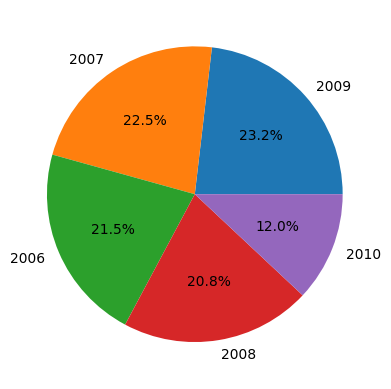

In [12]:
plt.pie(rel, labels=rel.index, autopct="%1.1f%%")
plt.show()

**Aufgabe:** Bitte berechnen Sie die empirische Verteilungsfunktion für das Merkmal "YrSold".

In [13]:
empiric = data.YrSold.value_counts(normalize=True).sort_index().cumsum()
print(empiric)

YrSold
2006    0.215068
2007    0.440411
2008    0.648630
2009    0.880137
2010    1.000000
Name: proportion, dtype: float64


## 2. Kennzahlen für stetige Merkmale

**AUFGABE:** Bitte berechnen Sie das arithmetische Mittel für den Verkaufspreis, d.h. die Spalte `SalePrice`!

**AUFGABE:** Bitte berechnen Sie den Median für den Verkaufspreis, d.h. die Spalte `SalePrice`!

**AUFGABE:** Bitte berechnen Sie den Modus für den Verkaufspreis, d.h. die Spalte `SalePrice`!

**AUFGABE:** Erstellen Sie ein Histogramm für das Merkmal `SalePrice`! Nutzen Sie dafür die Funktion `plot`. Wie viele Klassen werden gebildet? Bitte verändern Sie die Einstellungen, damit 20 äquidistante Klassen gebildet werden!

**AUFGABE:** Erstellen Sie eine Abbildung, die die empirische Verteilungsfunktion für das Merkmal `SalePrice` zeigt!

**AUFGABE:** Bitte berechnen Sie die Standardabweichung, Varianz und den Variationskoeffizienten für das Merkmal `SalePrice`!

**Varianzverschiebungssatz**

$s^2= \frac{1}{N} \sum_{i=1}^{N} (x_i - \bar{x})^2 = \frac{1}{N} \sum_{i=1}^{N} (x_i)^2 - \bar{x}^2$

In [14]:
N = len(data)
X_mean = data.SalePrice.mean()

$s^2= \frac{1}{N} \sum_{i=1}^{N} (x_i - \bar{x})^2$

In [15]:
data.SalePrice.apply(lambda x: (x-X_mean)**2).sum()/N

np.float64(6306788585.349299)

$s^2= \frac{1}{N} \sum_{i=1}^{N} (x_i)^2 - \bar{x}^2$

In [16]:
data.SalePrice.apply(lambda x: x**2).sum()/N - X_mean**2

np.float64(6306788585.349304)

## 3. Kontingenz- und Korrelationsanalyse

**AUFGABE:** Bitte erstellen Sie eine Kreuztabelle für die Merkmale `Fireplaces` und `TotRmsAbvGrd`! Die Kreuztabelle soll die absoluten Häufigkeiten wiederspiegeln.

In [17]:
pd.crosstab(data.Fireplaces, data.TotRmsAbvGrd)

TotRmsAbvGrd,2,3,4,5,6,7,8,9,10,11,12,14
Fireplaces,,,,,,,,,,,,
0,1,12,77,184,218,111,58,12,10,3,3,1
1,0,5,15,77,158,187,115,53,27,9,4,0
2,0,0,5,14,26,29,13,9,10,6,3,0
3,0,0,0,0,0,2,1,1,0,0,1,0


**AUFGABE:** Bitte ergänzen Sie jeweils die Randhäufigkeiten zur Kreuztabelle.

In [19]:
pd.crosstab(data.Fireplaces, data.TotRmsAbvGrd, margins=True)

TotRmsAbvGrd,2,3,4,5,6,7,8,9,10,11,12,14,All
Fireplaces,,,,,,,,,,,,,
0,1,12,77,184,218,111,58,12,10,3,3,1,690
1,0,5,15,77,158,187,115,53,27,9,4,0,650
2,0,0,5,14,26,29,13,9,10,6,3,0,115
3,0,0,0,0,0,2,1,1,0,0,1,0,5
All,1,17,97,275,402,329,187,75,47,18,11,1,1460


**AUFGABE:** Bitte stellen Sie nun die relativen Häufigkeiten in der Kreuztabelle dar.

In [20]:
pd.crosstab(data.Fireplaces, data.TotRmsAbvGrd, margins=True, normalize=True).round(2)*100

TotRmsAbvGrd,2,3,4,5,6,7,8,9,10,11,12,14,All
Fireplaces,,,,,,,,,,,,,
0,0.0,1.0,5.0,13.0,15.0,8.0,4.0,1.0,1.0,0.0,0.0,0.0,47.0
1,0.0,0.0,1.0,5.0,11.0,13.0,8.0,4.0,2.0,1.0,0.0,0.0,45.0
2,0.0,0.0,0.0,1.0,2.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,8.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
All,0.0,1.0,7.0,19.0,28.0,23.0,13.0,5.0,3.0,1.0,1.0,0.0,100.0


**AUFGABE:** Bitte erstellen Sie eine Pivottabelle, die für jede Kombination von Verkaufsjahr (`YrSold`) und Qualitätsindex einer Immobilie (`OverallQual`) den mittleren Verkaufspreis (`SalePrice`) wiedergibt.

In [30]:
pd.pivot_table(data, index="YrSold", columns="OverallQual", values="SalePrice", aggfunc="median")

OverallQual,1,2,3,4,5,6,7,8,9,10
YrSold,,,,,,,,,,
2006,NaN,35311.0,93500.0,107000.0,135960.0,156950.0,200050.0,268000.0,360000.0,470000.0
2007,39300.0,NaN,99500.0,110000.0,132000.0,168000.0,194800.5,278606.5,319030.5,605750.0
2008,NaN,NaN,69750.0,110129.0,130500.0,165500.0,198000.0,274000.0,328900.0,355000.0
2009,61000.0,60000.0,88950.0,103950.0,132750.0,161500.0,199250.0,257000.0,335000.0,394555.5
2010,NaN,NaN,76500.0,108888.0,132500.0,152000.0,216000.0,253925.0,386466.0,NaN


**AUFGABE:** Erstellen Sie einen Scatterplot für die Merkmale `SalePrice` und `GrLivArea`.

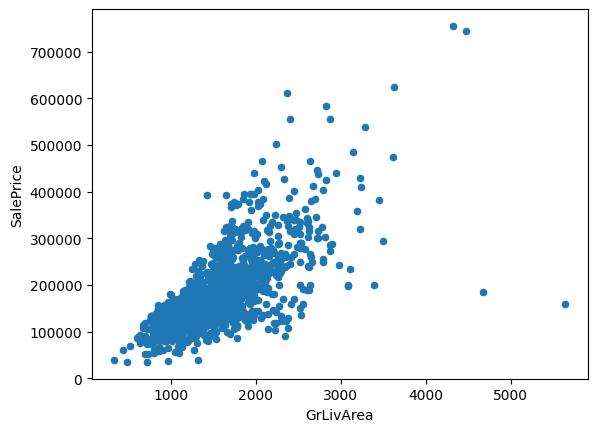

In [34]:
data.plot.scatter(x="GrLivArea", y="SalePrice")
plt.show()

**AUFGABE:** Berechnen Sie den Pearson-Bravais Korrelationskoeffizienten für die Merkmale `SalePrice` und `GrLivArea`.

## 4. Regressionsanalyse

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
import matplotlib.pyplot as plt

**AUFGABE:** Bitte bestimmen Sie die Regressionsgerade, die den statistischen Zusammenhang zwischen `SalePrice` und `GrLivArea` bestmöglich beschreibt. Was sind die Parameter ($\hat{a}, \hat{b}$) der Regressionsgeraden?

**AUFGABE:** Bitte bestimmen Sie den mittleren absoluten Fehler, den mittleren absoluten prozentualen Fehler sowie das Bestimmtheitsmaß?

**AUFGABE:** Bitte erstellen Sie einen Scatter Plot für die Merkmale `GrLivArea` und `SalePrice`, in dem die zuvor berechnete Regressionsgerade eingezeichnet ist?